In [561]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [562]:
path=os.getcwd()+'/Big_mart.csv'
df=pd.read_csv(path)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [563]:
df.shape

(8523, 12)

In [564]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [565]:
df.describe(include=['object','bool'])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDG33,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [566]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [567]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [568]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [569]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [570]:
df['Outlet_Size'].mode()[0]

'Medium'

In [571]:
df['Outlet_Size']=df['Outlet_Size'].fillna((df['Outlet_Size'].mode()[0]))
df=df.fillna(df.mean())

In [572]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [573]:
df['Item_Visibility'].replace(0.000000,np.nan,inplace=True)
df['Item_Visibility']=df['Item_Visibility'].fillna(df['Item_Visibility'].mean())

In [574]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.070482,140.992782,1997.831867,2181.288914
std,4.226124,0.048730,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,9.310000,0.033085,93.826500,1987.000000,834.247400
50%,12.857645,0.062517,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [575]:
df.describe(include=['object','bool'])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523,8523
unique,1559,5,16,10,3,3,4
top,FDG33,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,5203,3350,5577


In [576]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [577]:
df['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat',inplace=True)
df['Item_Fat_Content'].replace('reg','Regular',inplace=True)

In [578]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [579]:
df.describe(include=['object','bool'])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523,8523
unique,1559,2,16,10,3,3,4
top,FDG33,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5517,1232,935,5203,3350,5577


In [580]:

df['New_Item_Identifier'] = df['Item_Identifier'].apply(lambda x: x[0:2])

df['New_Item_Identifier'] = df['New_Item_Identifier'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
df['New_Item_Identifier'].value_counts()

    

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Identifier, dtype: int64

In [581]:
df.describe(include=['object','bool'])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Identifier
count,8523,8523,8523,8523,8523,8523,8523,8523
unique,1559,2,16,10,3,3,4,3
top,FDG33,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1,Food
freq,10,5517,1232,935,5203,3350,5577,6125


In [582]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
New_Item_Identifier           object
dtype: object

In [583]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['New_Item_Identifier']=le.fit_transform(df['New_Item_Identifier'])
df['Item_Fat_Content']=le.fit_transform(df['Item_Fat_Content'])
df['Outlet_Identifier']=le.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size']=le.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type']=le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type']=le.fit_transform(df['Outlet_Type'])

In [584]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
New_Item_Identifier            int64
dtype: object

In [585]:
x=df.drop(['Item_Identifier','Item_Type','Item_Outlet_Sales'],axis=1)
y=pd.DataFrame(df['Item_Outlet_Sales'])
y=y.astype('int')

In [586]:
y.dtypes

Item_Outlet_Sales    int32
dtype: object

In [587]:
x.dtypes

Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
New_Item_Identifier            int64
dtype: object

In [588]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
New_Item_Identifier            int64
dtype: object

In [589]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 
selector=SelectKBest(chi2,k=4)
x_new=selector.fit_transform(x,y) 
x.columns[selector.get_support(indices=True)]

Index(['Item_Weight', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Type'], dtype='object')

In [590]:
df=pd.get_dummies(df,columns=['Outlet_Identifier','Outlet_Type'])

In [591]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Item_Outlet_Sales            float64
New_Item_Identifier            int64
Outlet_Identifier_0            uint8
Outlet_Identifier_1            uint8
Outlet_Identifier_2            uint8
Outlet_Identifier_3            uint8
Outlet_Identifier_4            uint8
Outlet_Identifier_5            uint8
Outlet_Identifier_6            uint8
Outlet_Identifier_7            uint8
Outlet_Identifier_8            uint8
Outlet_Identifier_9            uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
dtype: object

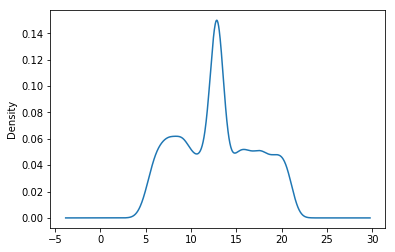

In [592]:
df['Item_Weight'].plot(kind='kde')

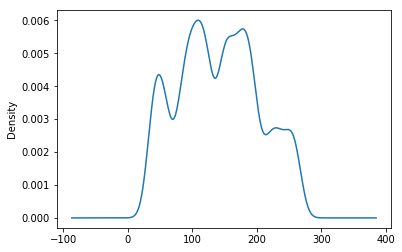

In [593]:
df['Item_MRP'].plot(kind='kde')

In [594]:
from sklearn import preprocessing
mrp_scaled=preprocessing.scale(df['Item_MRP'])

In [595]:
df['Item_MRP']=mrp_scaled

In [596]:
xx=df.drop(['Item_Identifier','Item_Type','Item_Visibility','Outlet_Establishment_Year','Item_Outlet_Sales','Item_Fat_Content','Outlet_Size','Outlet_Location_Type','New_Item_Identifier'],axis=1)

In [597]:
xx.columns

Index(['Item_Weight', 'Item_MRP', 'Outlet_Identifier_0', 'Outlet_Identifier_1',
       'Outlet_Identifier_2', 'Outlet_Identifier_3', 'Outlet_Identifier_4',
       'Outlet_Identifier_5', 'Outlet_Identifier_6', 'Outlet_Identifier_7',
       'Outlet_Identifier_8', 'Outlet_Identifier_9', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3'],
      dtype='object')

In [598]:
yy=df['Item_Outlet_Sales']

In [599]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(xx,yy,test_size=0.2)

In [600]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [601]:
df_coef=pd.DataFrame(reg.coef_,index=xx.columns,columns=['coeff'])

In [602]:
df_coef.head()

,coeff
Item_Weight,-2.254750
Item_MRP,980.101575
Outlet_Identifier_0,-561.682617
Outlet_Identifier_1,29.225183
Outlet_Identifier_2,93.824403


In [603]:
y_pred=reg.predict(x_test)

In [604]:
pred=pd.DataFrame.from_dict({'Actual':y_test,'Predicted':y_pred})
pred.head()

,Actual,Predicted
3668,1390.1904,2002.884930
4687,2463.4600,3915.436064
7886,1857.5820,1805.363788
6530,1324.2762,1377.901021
7974,1830.9500,2931.203550


In [605]:
accuracy=reg.score(x_train,y_train)
print('train accuracy=',accuracy*100,'%')
accuracy1=reg.score(x_test,y_test)
print('test accuracy=',accuracy1*100,'%')

train accuracy= 56.24243763989932 %
test accuracy= 56.59356982698278 %


In [606]:
metrics.explained_variance_score(y_test, y_pred)

0.5659367697698552